<a href="https://colab.research.google.com/github/lionandjelka/NEWPERIODICITY/blob/main/SIMPLETUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMPLE TUTORIAL WITH MOCK LIGHT CURVE

In [1]:
!mkdir period

mkdir: period: File exists


In [2]:
%cd period

/Users/andjelka/Documents/QhX12/source/examples/period


**Import libraries and create artifical LC to test the module** 


In [6]:
import QhX

In [7]:
!pwd

/Users/andjelka/Documents/QhX12/source/examples/period


In [8]:
import json
import pandas as pd
import numpy as np
from sqlalchemy.engine import URL
from sqlalchemy.engine import create_engine
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
from dateutil.relativedelta import relativedelta
import warnings
from itertools import groupby

In [9]:
# Used to be able to capture optimizer warnings
warnings.simplefilter("error", OptimizeWarning)


In [10]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [11]:
## commonly used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
import yaml

pd.set_option('display.max_columns', 999)


In [12]:
from QhX import plots

In [13]:
from QhX.utils import *

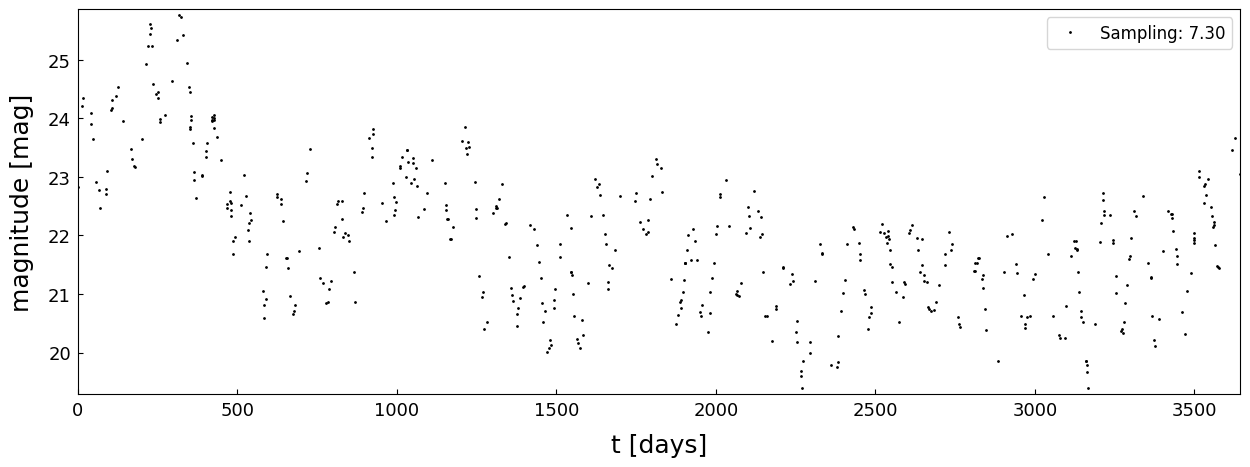

In [14]:
# Creating of a mock signal LC with frequency of 100 days, amplitude of 0.3
# Plot is created using functions in the utils subpackage
period = 100  # days
amplitude = 0.3
tt, yy = simple_mock_lc(time_interval=10, num_points=1000, frequency=period, amplitude=amplitude, percent=0.5, magnitude=22)
plots.fig_plot(tt, yy)

** Periodicity determination using WWZ
✨WWZ-Weighted Wavelet Z-transform** **

Foster, G., Wavelets for period analysis of unevenly sampled time series, Astronomical Journal v.112, p.1709-1729, doi: 10.1086/118137

Data cadence: irregular

The method, projects the data on the basis u cos  and the constant function . The projection in addition uses weights of the form , with c being a tunable parameter.

Tuning constant  used to adjust the width of the window can be , as originally proposed in Foster (1996), for improved time resolution on shorter segments of the data. Second, c can have values up to 0.005, used for the entire data set to improve frequency resolution. This translates to the wavelet decaying by  in ∼1.4 cycles in the first case and ∼2.4 cycles in the second case. The values can be compared to e.g. c = 0.001 used in Templeton, Mattei & Willson (2005) and Young et al. (2012), for longer data sets than the one used here.

In [15]:
from QhX.algorithms.wavelets.wwtz import *

In [16]:
# In order to perform our analysis we need to apply hybrid2d method 
# Input parametars are time data, magnitude data and parameteres for WWZ transformation, ntau, ngrid - grid size
# As output main products are wwz matrix and autocorrelation matrix of wwz
      
wwz_matrix, corr, extent = hybrid2d(tt, yy, 80, 800, minfq=2000,maxfq=10)
      
        


*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
8.13 seconds has passed to complete Weighted Wavelet Z-transform 



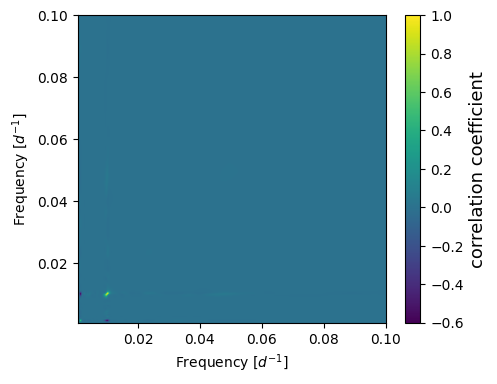

In [17]:
# Plotting wwz matrix heatmap
# Note how er can easly spot detected period
plots.plt_freq_heatmap(corr, extent)

**Finding the error of the detected period**
Reference: Schwarzenberg-Czerny, A., 1991, Mon. Not. R. astr. Soc., 253, 198-206

The period uncertainty method of Schwarzenberg-Czerny requires the so called Mean Noise Power Level (MNPL) in the vicinity of P. The 1-sigma confidence interval on P then is equal to the width of the line at the P – MNPL level. This method is a so-called ‘post-mortem analysis’. To find the MNPL we detect FWHM of the peak and then use mquantile method to detect points between 25th and 75th quantile

In [19]:
from QhX.calculation import *


In [20]:
# Determine significance
# Assuming the use of a function like signif_johnson (though not explicitly found in the provided notebook cells)
numlc1 =10  # Example Object ID
numlc=10 #number of lc for johnson method
peak = 0  # Example peak position
idx_peaks = [0]  # Example index of peak, assuming a single peak
# Extract periods
# Detect periods in the correlation matrix and store results in peaks0, hh0, r_periods0, up0, low0
peaks0, hh0, r_periods0, up0, low0 = periods(numlc1, corr, 800, plot=False, minfq=2000, maxfq=10)
    


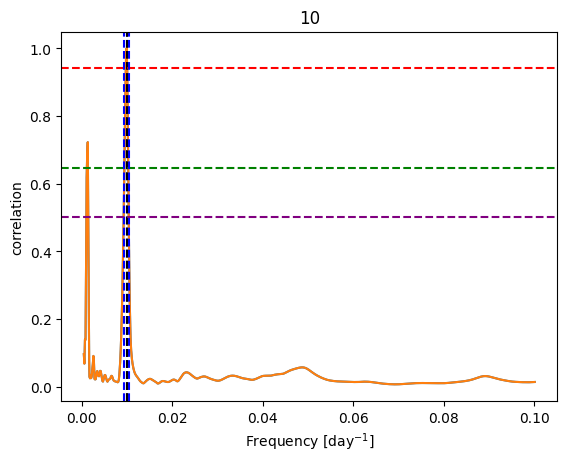

In [21]:
# Function for calculations of periods
peaks0, hh0, r_periods0, up0, low0 = periods(10, corr, 800, plot=True, minfq=2000, maxfq=10)

# Blue vertical lines represent the border of a half width of a peak
# Green and red horizontal lines represent the calculated values of a quantiles
# Purple line is a calculated value of half width of a peak

In [22]:
# Write down obtained results 
for j in range(len(r_periods0)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods0[j], up0[j], low0[j]) )
        

Period: 100.477, upper error : 20.22  lower error :  1.21


⚡ **Significance of detected period based on Johnson et al (faster approach)**

The dates of all observations and magnitudes were shuffled; the period was recomputed over this new modified data set and the power of the maximum peak in this uncorrelated data set was compared to that of the original simulated data. This process was repeated N(100) times and the significance level was then determined as
 
 

where x represents the number of times that the peak power of the period in the original data was greater than that of the uncorrelated ensemble and N is the total number of shuffles. This formula therefore has a maximum of 1, corresponding to a 100 per cent recovery rate.

Reference

Michael A. C. Johnson, Poshak Gandhi, Adriane P. Chapman, Luc Moreau, Philip A. Charles, William I. Clarkson and Adam B. Hill, Prospecting for periods with LSST – low-mass X-ray binaries as a test case, 2019, MNRAS, Volume 484, https://doi.org/10.1093/mnras/sty3466

In [23]:
yax = corr.flatten()  # Example correlation of oscillation patterns
bins, bins11, sig, siger = signif_johnson(numlc,peak, idx_peaks, hh0, tt, yy, ntau=80, ngrid=800, f=2, peakHeight=0.6, minfq=2000, maxfq=10)


*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
7.37 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
8.19 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
8.61 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
9.03 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
8.98 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample freq

Text(0.5, 1.0, 'correlation peak for artificial curves')

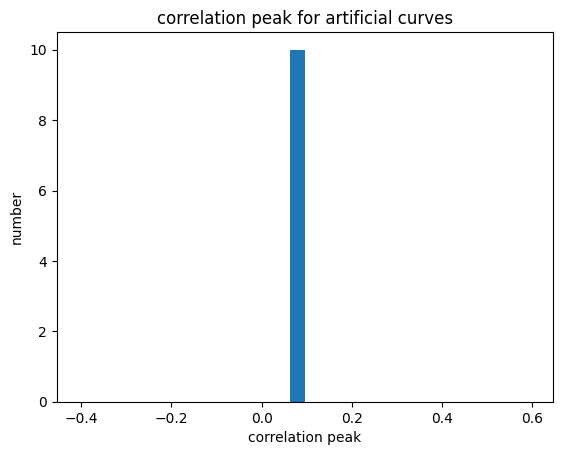

In [24]:
plt.hist(bins,30)
bins=np.array(bins)
plt.xlabel('correlation peak')
plt.ylabel('number')
plt.title('correlation peak for artificial curves')
